In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt

from src.contextual_distros import ContextualLatentSpaceGMM

In [3]:
device = torch.device("cpu")

0.75


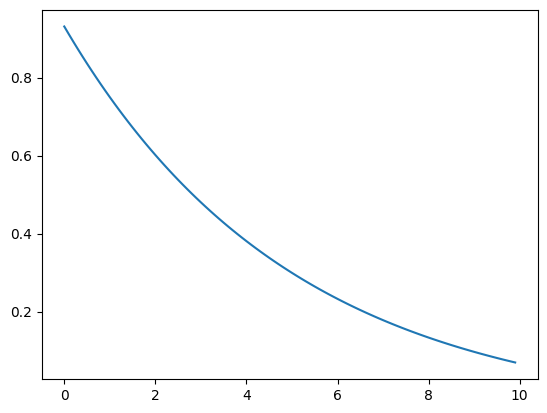

In [4]:
x = np.arange(0, 10, 0.1)

a = 0.2
b = 0.75 - np.exp(-a) # a + 0.75 

y = np.exp(-a * x) + b # -a * x + b

plt.plot(x, y)

print(y[10])

In [5]:
context_size = 5
z_dim = 2
num_samples = 10000

context = torch.rand((num_samples, context_size, z_dim), device=device) * 3
# context = torch.ones((context_size, z_dim), device=device) * 1.5
print(context.shape)

p_z = ContextualLatentSpaceGMM(context)

print(p_z.mu.shape)
print(p_z.sigma.shape)
print([g.mean for g in p_z.gaussians])

torch.Size([10000, 5, 2])
torch.Size([10000, 2])
torch.Size([10000, 2])
[tensor([[1.5004, 1.7963],
        [1.0714, 1.8220],
        [1.2693, 1.2909],
        ...,
        [1.4558, 1.7673],
        [1.7820, 1.8471],
        [2.1769, 1.6485]]), tensor([[ 1.5004, -1.7963],
        [ 1.0714, -1.8220],
        [ 1.2693, -1.2909],
        ...,
        [ 1.4558, -1.7673],
        [ 1.7820, -1.8471],
        [ 2.1769, -1.6485]]), tensor([[-1.5004,  1.7963],
        [-1.0714,  1.8220],
        [-1.2693,  1.2909],
        ...,
        [-1.4558,  1.7673],
        [-1.7820,  1.8471],
        [-2.1769,  1.6485]]), tensor([[-1.5004, -1.7963],
        [-1.0714, -1.8220],
        [-1.2693, -1.2909],
        ...,
        [-1.4558, -1.7673],
        [-1.7820, -1.8471],
        [-2.1769, -1.6485]])]


torch.Size([10000, 2])


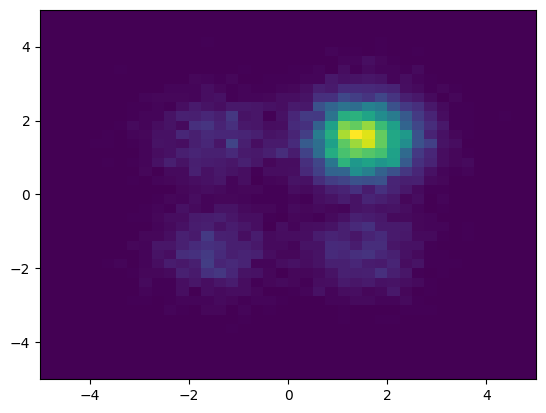

In [6]:
samples = p_z.sample()

print(samples.shape)

plt.hist2d([z[0] for z in samples], [z[1] for z in samples], bins=40, range=[(-5, 5), (-5, 5)])
plt.ylim(-5, 5)
plt.xlim(-5, 5)
plt.show()

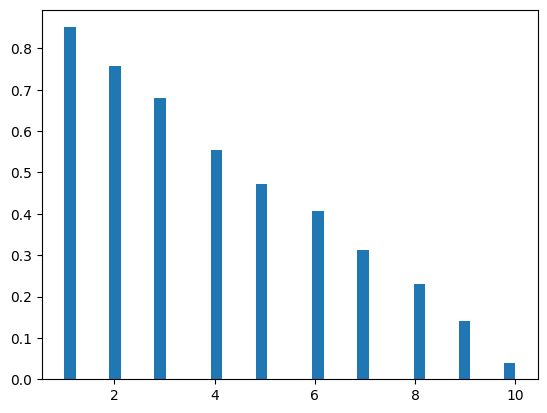

In [61]:
samples = np.ceil(np.random.beta(a=1, b=2, size=(10000, 1)) * 10)
plt.hist(samples, bins=40, density=True)
plt.show()

In [81]:
rand_context_sizes = torch.tensor(
        np.ceil(np.random.beta(a=1, b=2, size=(20, 1)) * 10),
        device=device,
    )
print(rand_context_sizes)

tensor([[5.],
        [2.],
        [3.],
        [1.],
        [3.],
        [6.],
        [1.],
        [4.],
        [8.],
        [1.],
        [4.],
        [8.],
        [2.],
        [3.],
        [9.],
        [8.],
        [4.],
        [4.],
        [4.],
        [5.]], dtype=torch.float64)
